In [2]:
# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset

In [5]:
cal = pd.read_csv("D:\Data science\Assignments docs\Simple Linear Regression\calories_consumed.csv")
cal

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [6]:
cal.shape

(14, 2)

In [7]:
cal.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [8]:
# Renaming the column for convinience

In [9]:
cal = cal.rename(columns = {"Weight gained (grams)" : "Weight_gain", "Calories Consumed" : "Cal_cons"})

In [10]:
cal.columns

Index(['Weight_gain', 'Cal_cons'], dtype='object')

In [11]:
cal.describe()        # for getting the summary

,Weight_gain,Cal_cons
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [12]:
# Graphical exploration of the data

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

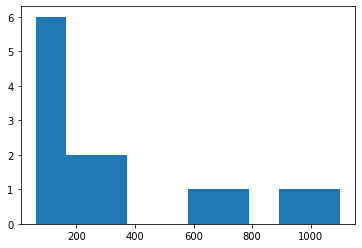

In [13]:
plt.hist(cal.Weight_gain)

{'whiskers': [<matplotlib.lines.Line2D at 0x19564605708>,
 'caps': [<matplotlib.lines.Line2D at 0x19564605fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x195645ffb88>],
 'medians': [<matplotlib.lines.Line2D at 0x1956460af48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1956460e5c8>],
 'means': []}

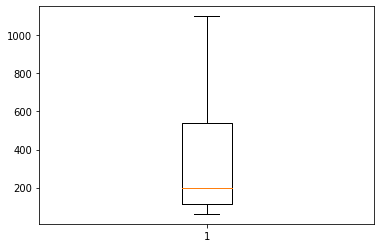

In [14]:
plt.boxplot(cal.Weight_gain)

In [15]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

In [16]:
cal.skew()  # skewness value should be o for normal distribution

Weight_gain    1.255737
Cal_cons       0.654930
dtype: float64

In [17]:
cal.kurt()  # kurtosis value should be 3 for normal distribution

Weight_gain    0.431272
Cal_cons      -0.290481
dtype: float64

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

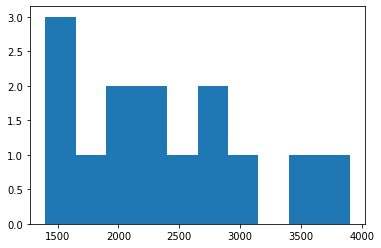

In [18]:
plt.hist(cal.Cal_cons)

{'whiskers': [<matplotlib.lines.Line2D at 0x195646fd948>,
 'caps': [<matplotlib.lines.Line2D at 0x195646fde48>,
 'boxes': [<matplotlib.lines.Line2D at 0x195646f7e08>],
 'medians': [<matplotlib.lines.Line2D at 0x19564703e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19564708fc8>],
 'means': []}

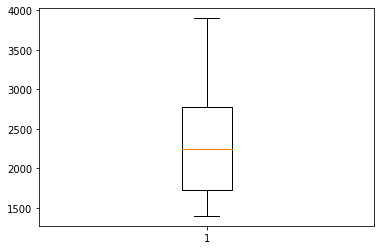

In [19]:
plt.boxplot(cal.Cal_cons)

In [20]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

Text(0, 0.5, 'Weight gained')

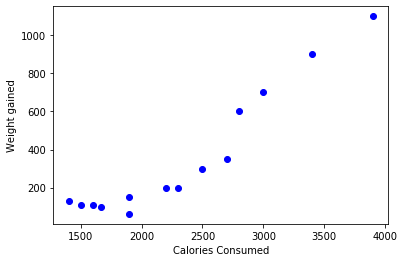

In [21]:
plt.plot(cal.Cal_cons, cal.Weight_gain, "bo"); plt.xlabel("Calories Consumed"); plt.ylabel("Weight gained")
# plot showing the relation between dependent and independent variables

In [22]:
cal.Weight_gain.corr(cal.Cal_cons)     # checking the correlation between the dependent and independent variables

0.9469910088554458

In [23]:
# For preparing linear regression model importing the statsmodels.formula.api

In [24]:
import statsmodels.formula.api as smf

In [25]:
model = smf.ols("Weight_gain ~ Cal_cons", data = cal).fit()           # Linear model

In [26]:
model.params

Intercept   -625.752356
Cal_cons       0.420157
dtype: float64

In [27]:
model.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_gain   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.86e-07
Time:                        19:33:24   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Cal_cons       0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print(model.conf_int(0.05))   # for 95% confidence interval

                    0           1
Intercept -845.426655 -406.078057
Cal_cons     0.330506    0.509807


In [29]:
# Predicting the values using the model

In [30]:
pred = model.predict(cal.Cal_cons)
pred

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

Text(0, 0.5, 'Weight gained')

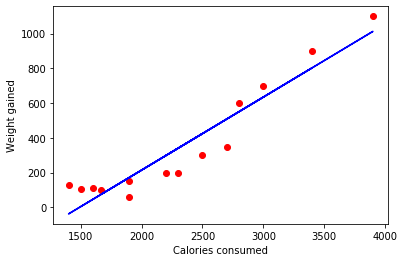

In [31]:
plt.scatter(cal.Cal_cons, cal.Weight_gain, color ="red"); plt.plot(cal.Cal_cons, pred, color ="blue"); plt.xlabel("Calories consumed"); plt.ylabel("Weight gained")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [32]:
pred.corr(cal.Weight_gain)

0.9469910088554457

In [33]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [34]:
model2 = smf.ols("Weight_gain~np.log(Cal_cons)", data = cal).fit()

In [35]:
model2.params

Intercept          -6955.650125
np.log(Cal_cons)     948.371723
dtype: float64

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_gain   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.25e-05
Time:                        19:33:26   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(Cal_cons)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(model2.conf_int(0.05))

                            0            1
Intercept        -9201.806288 -4709.493961
np.log(Cal_cons)   657.325124  1239.418323


In [38]:
# Predicting the values using the model

In [39]:
pred2 = model2.predict(cal.Cal_cons)

In [40]:
pred2

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64

Text(0, 0.5, 'Weight gained')

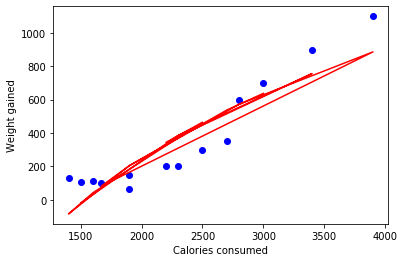

In [41]:
plt.scatter(cal.Cal_cons, cal.Weight_gain, color ="blue"); plt.plot(cal.Cal_cons, pred2, color = "red"); plt.xlabel("Calories consumed"); plt.ylabel("Weight gained")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [42]:
pred2.corr(cal.Weight_gain)

0.8987252805287712

In [43]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [44]:
model3 = smf.ols("np.log(Weight_gain) ~ Cal_cons", data = cal).fit()

In [45]:
model3.params

Intercept    2.838672
Cal_cons     0.001134
dtype: float64

In [46]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(Weight_gain)   R-squared:                       0.878
Model:                             OLS   Adj. R-squared:                  0.867
Method:                  Least Squares   F-statistic:                     86.04
Date:                 Tue, 11 Aug 2020   Prob (F-statistic):           8.02e-07
Time:                         19:33:27   Log-Likelihood:                -3.3244
No. Observations:                   14   AIC:                             10.65
Df Residuals:                       12   BIC:                             11.93
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8387      0.299      9.479      0.000       2.186       3.491
Cal_cons       0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
print(model3.conf_int(0.05))       # for 95% confidence interval

                  0         1
Intercept  2.186209  3.491136
Cal_cons   0.000867  0.001400


In [48]:
pred_log = model3.predict(cal.Cal_cons)     # predicted values

In [49]:
pred_log

0     4.539069
1     5.445947
2     6.692904
3     5.332587
4     5.672666
5     4.652428
6     4.425709
7     4.992508
8     6.012745
9     7.259702
10    4.731780
11    4.992508
12    5.899386
13    6.239465
dtype: float64

In [50]:
pred3 = np.exp(pred_log)     # Predicting the values using the model
pred3

0       93.603577
1      231.816603
2      806.661188
3      206.972681
4      290.808810
5      104.839263
6       83.572027
7      147.305340
8      408.603511
9     1421.833419
10     113.497427
11     147.305340
12     364.813232
13     512.584083
dtype: float64

Text(0, 0.5, 'Weight gained')

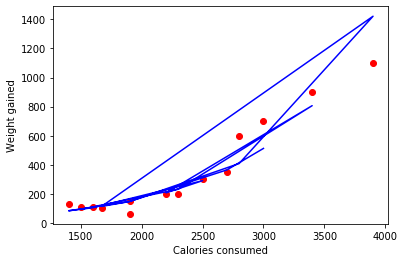

In [51]:
plt.scatter(cal.Cal_cons, cal.Weight_gain, color="red"); plt.plot(cal.Cal_cons, pred3, color="blue"); plt.xlabel("Calories consumed"); plt.ylabel("Weight gained")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [52]:
pred3.corr(cal.Weight_gain)

0.9437992041960713

In [53]:
cal["Cal_cons_sq"] = cal.Cal_cons*cal.Cal_cons

In [54]:
# bulinding another model(quadratic) to check whether the R_square value can be increased

In [55]:
model4 = smf.ols("np.log(Weight_gain) ~ Cal_cons + Cal_cons_sq", data = cal).fit()

In [56]:
model4.params

Intercept      2.828719e+00
Cal_cons       1.142146e-03
Cal_cons_sq   -1.675054e-09
dtype: float64

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_gain   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.86e-07
Time:                        19:33:28   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Cal_cons       0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
print(model4.conf_int(0.05))

                        0             1
Intercept    4.920101e-01  5.165429e+00
Cal_cons    -7.962832e-04  3.080576e-03
Cal_cons_sq -3.774780e-07  3.741279e-07


In [59]:
pred_quad = model4.predict(cal)     # predicting the values using the model
pred_quad

0     4.538170
1     5.446795
2     6.692653
3     5.333334
4     5.673616
5     4.651865
6     4.424441
7     4.992750
8     6.013597
9     7.257612
10    4.731432
11    4.992750
12    5.900303
13    6.240083
dtype: float64

In [60]:
pred4 = np.exp(pred_quad)
pred4

0       93.519497
1      232.013330
2      806.459099
3      207.127381
4      291.085209
5      104.780251
6       83.466143
7      147.341113
8      408.951512
9     1418.864795
10     113.457933
11     147.341113
12     365.148180
13     512.900975
dtype: float64

Text(0, 0.5, 'Weight gained')

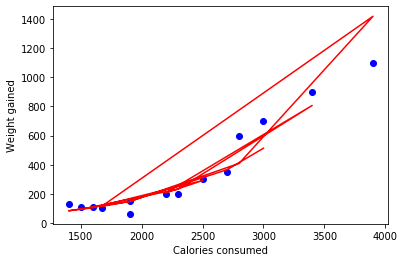

In [61]:
plt.scatter(cal.Cal_cons, cal.Weight_gain, color ="blue"); plt.plot(cal.Cal_cons, pred4, color="red"); plt.xlabel("Calories consumed"); plt.ylabel("Weight gained")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [62]:
pred4.corr(cal.Weight_gain)

0.9441703889446103

In [ ]:
# Creating the table of models and thier R_square values

In [64]:
data = {"Model":pd.Series(["model1_linear","model2_exponential","model3_exponential","model4_quadratic"]),"R_square_values":(0.897,0.808,0.878,0.897)}

In [65]:
table_rsquare = pd.DataFrame(data)
table_rsquare

,Model,R_square_values
0,model1_linear,0.897
1,model2_exponential,0.808
2,model3_exponential,0.878
3,model4_quadratic,0.897


In [66]:
# Out of all the 4 models, first model (linear_model) has the highest R-square value, hence it is the best fit model

In [67]:
student_resid = model.resid_pearson      # Calculating the standard residuals of the best model
student_resid

array([ 0.92774607, -1.26015949,  0.87130549, -0.88360572, -1.11704467,
        0.56911675,  1.4835443 , -0.99073126,  0.44196105,  0.78098135,
        0.21590689, -0.2020556 , -1.42204103,  0.58507587])

Text(0, 0.5, 'Standard residuals')

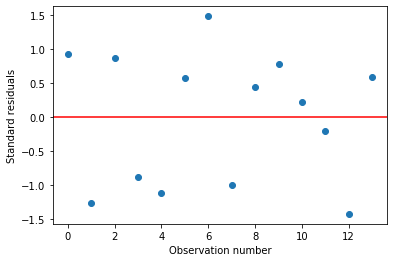

In [68]:
plt.plot(student_resid, "o"); plt.axhline(y=0, color="red"); plt.xlabel("Observation number"); plt.ylabel("Standard residuals")
# plot showing the standard residuals v/s observed values

Text(0, 0.5, 'Actual')

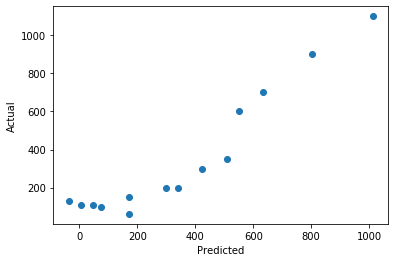

In [69]:
plt.scatter(pred, cal.Weight_gain); plt.xlabel("Predicted"); plt.ylabel("Actual")
# plot showing the relation between the actual and predicted values of best fit model

(array([2., 3., 0., 0., 1., 1., 3., 2., 1., 1.]),
 array([-1.42204103, -1.1314825 , -0.84092396, -0.55036543, -0.2598069 ,
         0.03075164,  0.32131017,  0.6118687 ,  0.90242724,  1.19298577,
         1.4835443 ]),
 <a list of 10 Patch objects>)

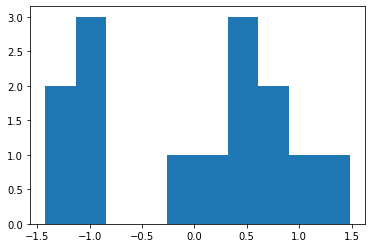

In [70]:
plt.hist(student_resid)        # histogram of standard residuals